Rows in COVID window after cleaning/dropna: 130
Example cleaned VIX: [12.39, 14.45, 12.16]
Example cleaned DFF: [2.41, 2.4, 2.41]


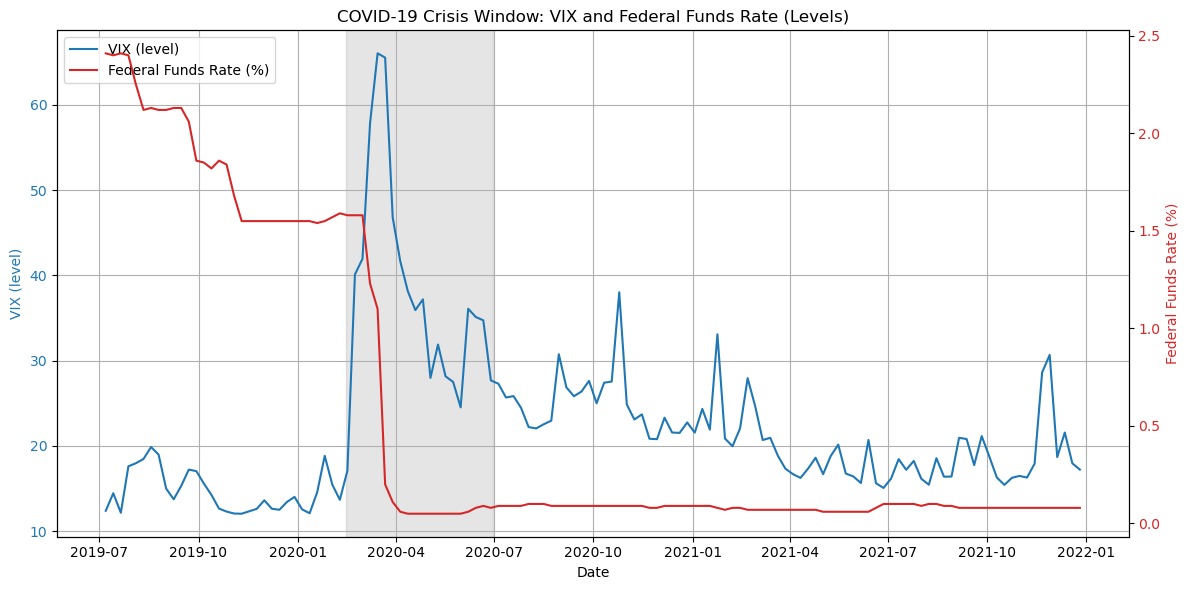

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/babo/Downloads/Data Science Project.csv"
date_col = "Date"

start_date = "2019-07-01"
end_date   = "2021-12-31"
shade_start = "2020-02-15"
shade_end   = "2020-06-30"

vix_col  = "CBOE Volatility Index (VIX)"
rate_col = "Federal Funds Effective Rate (DFF)"

df = pd.read_csv(file_path, sep=";", engine="python")
df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")
df = df.sort_values(date_col).reset_index(drop=True)

def to_number(x):
    if pd.isna(x):
        return None
    s = str(x)

    # remove currency/percent and weird spaces
    s = s.replace("\u00A0", "")  # non-breaking space
    s = s.replace(" ", "")
    s = s.replace("%", "")
    s = s.replace("$", "")

    # keep only digits, comma, dot, minus
    s = re.sub(r"[^0-9,\.\-]", "", s)

    # if both comma and dot exist: assume dot is thousands and comma is decimal (EU style)
    if "," in s and "." in s:
        s = s.replace(".", "")
        s = s.replace(",", ".")
    # if only comma: treat comma as decimal
    elif "," in s and "." not in s:
        s = s.replace(",", ".")

    return pd.to_numeric(s, errors="coerce")

df[vix_col] = df[vix_col].apply(to_number)
df[rate_col] = df[rate_col].apply(to_number)

# Filter COVID window
mask = (df[date_col] >= start_date) & (df[date_col] <= end_date)
df_win = df.loc[mask, [date_col, vix_col, rate_col]].dropna()

print("Rows in COVID window after cleaning/dropna:", len(df_win))
print("Example cleaned VIX:", df_win[vix_col].head(3).tolist())
print("Example cleaned DFF:", df_win[rate_col].head(3).tolist())

# Plot if we have data
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_win[date_col], df_win[vix_col], color="tab:blue", label="VIX (level)")
ax1.set_xlabel("Date")
ax1.set_ylabel("VIX (level)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df_win[date_col], df_win[rate_col], color="tab:red", label="Federal Funds Rate (%)")
ax2.set_ylabel("Federal Funds Rate (%)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

ax1.axvspan(pd.to_datetime(shade_start), pd.to_datetime(shade_end), color="grey", alpha=0.2)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("COVID-19 Crisis Window: VIX and Federal Funds Rate (Levels)")
ax1.grid(True)
plt.tight_layout()
plt.show()


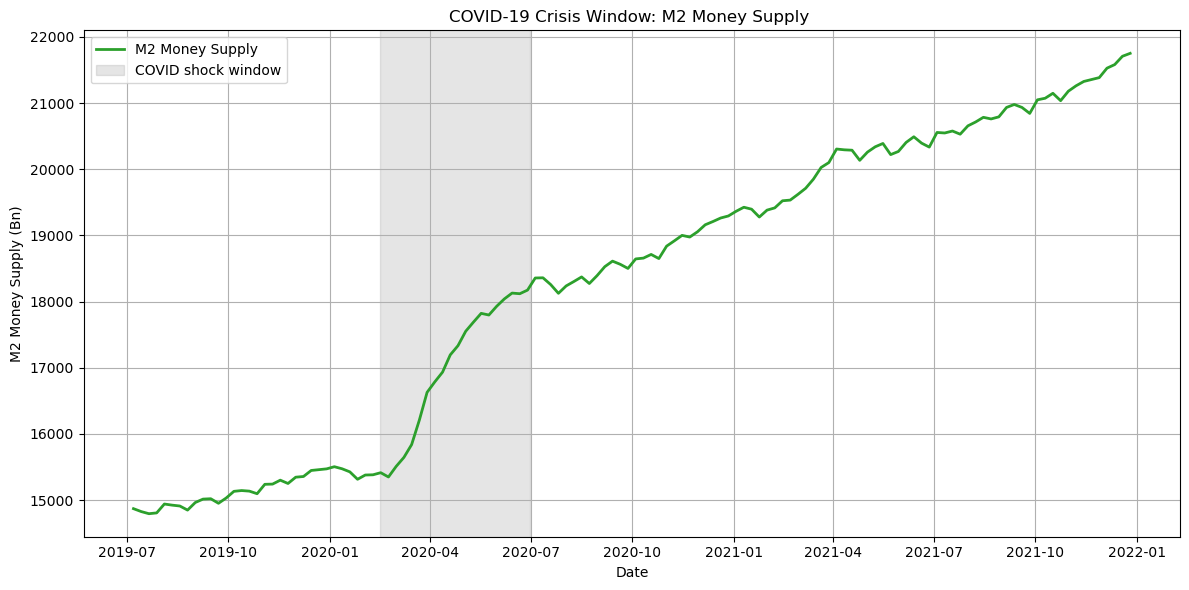

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# -----------------------
# Settings
# -----------------------
file_path = "/Users/babo/Downloads/Data Science Project.csv"
date_col = "Date"

# Same COVID window as VIX / interest rate
start_date  = "2019-07-01"
end_date    = "2021-12-31"
shade_start = "2020-02-15"
shade_end   = "2020-06-30"

m2_col = "M2 Money Supply (Bn)"

# -----------------------
# Load levels dataset
# -----------------------
df = pd.read_csv(file_path, sep=";", engine="python")

# Parse dates
df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors="coerce")
df = df.sort_values(date_col).reset_index(drop=True)

# Robust numeric cleaner
def to_number(x):
    if pd.isna(x):
        return None
    s = str(x)
    s = s.replace("\u00A0", "").replace(" ", "").replace("$", "")
    s = re.sub(r"[^0-9,\.\-]", "", s)

    if "," in s and "." in s:
        s = s.replace(".", "")
        s = s.replace(",", ".")
    elif "," in s:
        s = s.replace(",", ".")

    return pd.to_numeric(s, errors="coerce")

df[m2_col] = df[m2_col].apply(to_number)

# -----------------------
# Filter COVID window
# -----------------------
mask = (df[date_col] >= start_date) & (df[date_col] <= end_date)
df_win = df.loc[mask, [date_col, m2_col]].dropna()

# -----------------------
# Plot M2 levels
# -----------------------
plt.figure(figsize=(12, 6))

plt.plot(
    df_win[date_col],
    df_win[m2_col],
    color="tab:green",
    linewidth=2,
    label="M2 Money Supply"
)

# Shade COVID shock window
plt.axvspan(
    pd.to_datetime(shade_start),
    pd.to_datetime(shade_end),
    color="grey",
    alpha=0.2,
    label="COVID shock window"
)

plt.title("COVID-19 Crisis Window: M2 Money Supply ")
plt.xlabel("Date")
plt.ylabel("M2 Money Supply (Bn)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


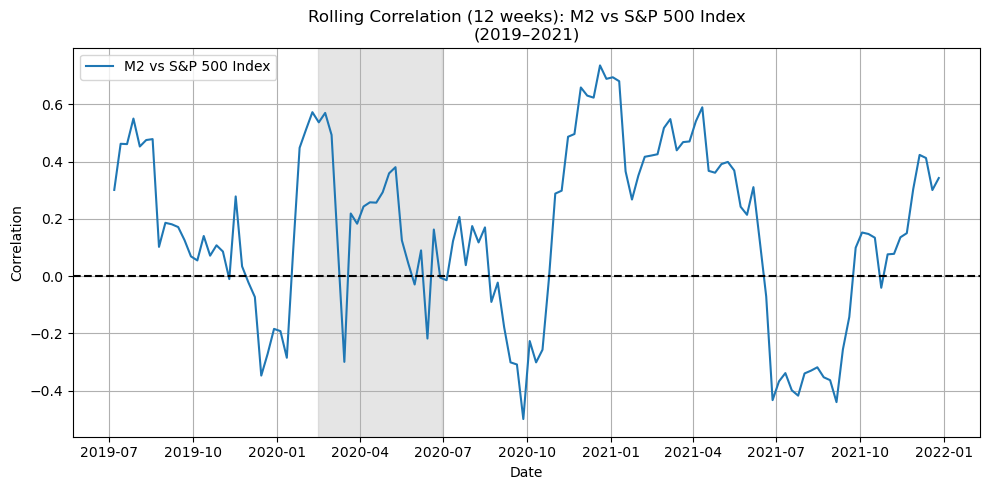

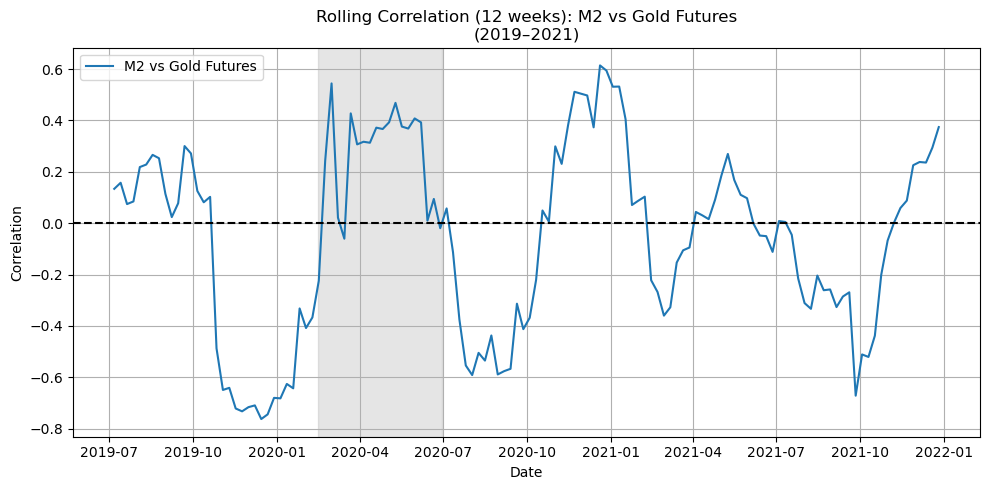

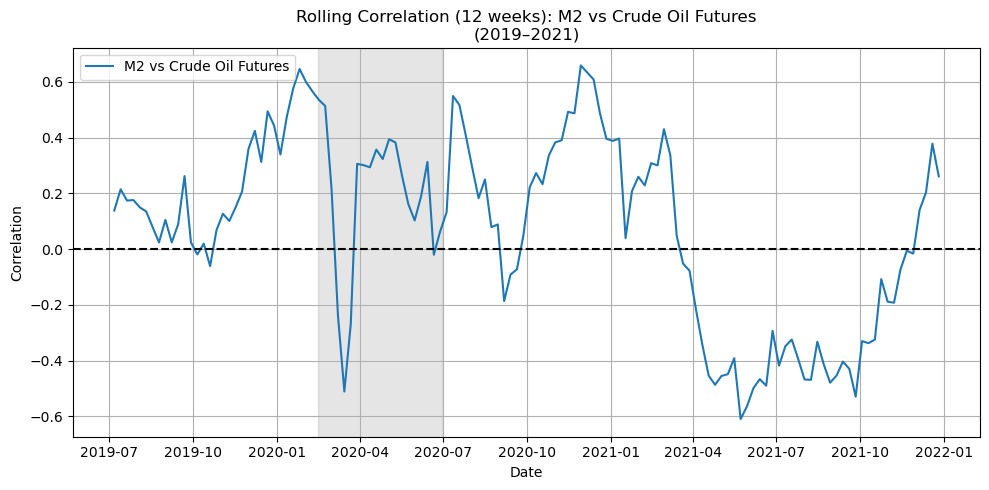

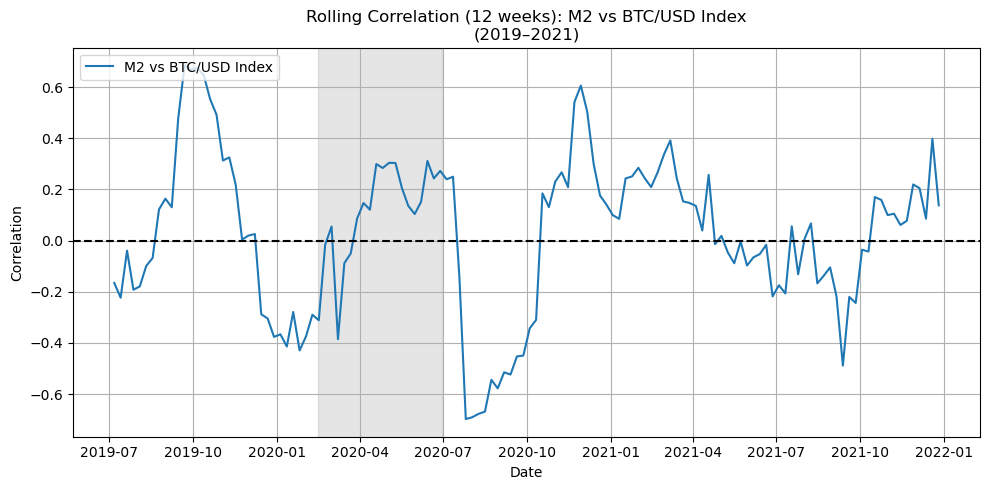

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# Config
# -----------------------
FILE = Path("/Users/babo/Downloads/Group-project-Data_Percent_Changes.csv")
WINDOW_WEEKS = 12
date_col = "Date"

# COVID window (same as your VIX + rates + M2 levels plots)
start_date = "2019-07-01"
end_date   = "2021-12-31"

# Shaded core COVID shock window
shade_start = "2020-02-15"
shade_end   = "2020-06-30"

# Assets to analyze
assets = [
    "S&P 500 Index",
    "Gold Futures",
    "Crude Oil Futures",
    "BTC/USD Index"
]

# -----------------------
# Load data (% changes)
# -----------------------
df = pd.read_csv(FILE)

# Parse dates and sort
df[date_col] = pd.to_datetime(df[date_col], format="%Y-%m-%d", errors="coerce")
df = df.sort_values(date_col).reset_index(drop=True)

# Convert all non-date columns to numeric
for c in df.columns:
    if c != date_col:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Identify M2 column
m2_candidates = [c for c in df.columns if "m2" in c.lower()]
if not m2_candidates:
    raise ValueError("Could not find the M2 column.")
m2_col = m2_candidates[0]

# Keep only assets that exist in the dataset
assets = [c for c in assets if c in df.columns]

# -----------------------
# Compute rolling correlations
# -----------------------
df_roll = df[[date_col]].copy()
for asset in assets:
    df_roll[asset] = df[m2_col].rolling(WINDOW_WEEKS).corr(df[asset])

# -----------------------
# Filter to COVID display window
# -----------------------
mask = (df_roll[date_col] >= start_date) & (df_roll[date_col] <= end_date)
df_roll_win = df_roll.loc[mask].copy()

# -----------------------
# Plot each asset separately (with shaded COVID window)
# -----------------------
for asset in assets:
    # Skip empty series in the selected window 
    if df_roll_win[asset].dropna().empty:
        print(f"Skipping {asset}: no rolling correlation data in {start_date} to {end_date}.")
        continue

    plt.figure(figsize=(10, 5))
    plt.plot(df_roll_win[date_col], df_roll_win[asset], label=f"M2 vs {asset}")
    plt.axhline(0, linestyle="--", color="black")

    # shaded COVID shock window
    plt.axvspan(pd.to_datetime(shade_start), pd.to_datetime(shade_end), color="grey", alpha=0.2)

    plt.title(f"Rolling Correlation ({WINDOW_WEEKS} weeks): M2 vs {asset}\n(2019–2021)")
    plt.xlabel("Date")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
